# Clustering

#K-Means

# Import Libraries

In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Import Datasets

In [521]:
import os

from google.colab import drive
drive.mount('/content/drive')
provinsi = pd.read_excel("/content/drive/My Drive/Analisis Multivariat/DATA UAS ANALISIS MULTIVARIAT.xlsx")
provinsi.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   38 Provinsi                                                            38 non-null     object 
 1   Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen)   38 non-null     float64
 2   Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen)  38 non-null     float64
 3   Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen)  38 non-null     float64
 4   Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah     38 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ KB


In [522]:
provinsi.head()

,38 Provinsi,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah
0,ACEH,12.33,1.84,0.42,716522
1,SUMATERA UTARA,7.36,1.13,0.26,694542
2,SUMATERA BARAT,5.35,0.74,0.16,753614
3,RIAU,6.16,0.87,0.20,758174
4,JAMBI,7.19,0.98,0.20,759799


# K-Means Clustering

In [523]:
provinsi.head()

,38 Provinsi,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah
0,ACEH,12.33,1.84,0.42,716522
1,SUMATERA UTARA,7.36,1.13,0.26,694542
2,SUMATERA BARAT,5.35,0.74,0.16,753614
3,RIAU,6.16,0.87,0.20,758174
4,JAMBI,7.19,0.98,0.20,759799


In [524]:
# check missing values
provinsi.isna().sum()

,0
38 Provinsi,0
Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),0
Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),0
Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),0
Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah,0


In [525]:
# check duplicates
provinsi.duplicated().sum()

np.int64(0)

In [526]:
# minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Select only numerical columns for scaling
# Assuming the first column '38 Provinsi' is the only non-numerical one
provinsi_numerical = provinsi.select_dtypes(include=np.number)
provinsi_scaled = scaler.fit_transform(provinsi_numerical)

pd.DataFrame(provinsi_scaled, columns=provinsi_numerical.columns).describe()

,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah
count,38.000000,38.000000,38.000000,38.000000
mean,0.261918,0.273633,0.239929,0.253423
std,0.248998,0.279290,0.274487,0.185331
min,0.000000,0.000000,0.000000,0.000000
25%,0.074306,0.076214,0.063272,0.155691
50%,0.219308,0.195146,0.148148,0.228470
75%,0.324876,0.285922,0.214506,0.325881
max,1.000000,1.000000,1.000000,1.000000


In [527]:
# elbow method from k=1 to k=10
from sklearn.cluster import KMeans

# track sum of squared error
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(provinsi_scaled)
    sse.append(kmeans.inertia_)

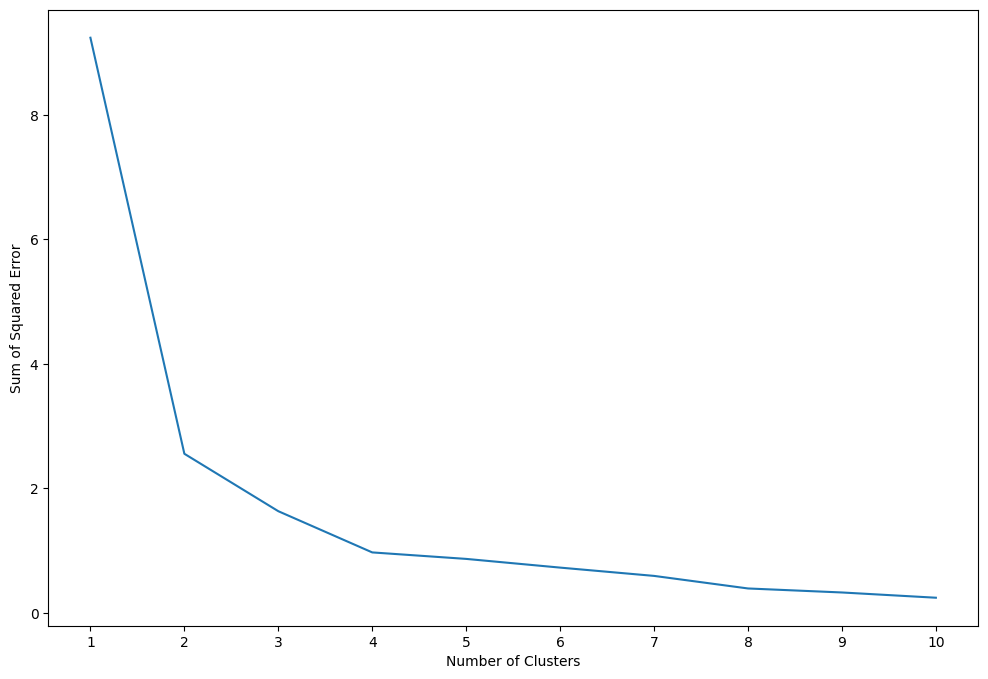

In [528]:
# draw the SSE decline progression
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

In [529]:
# retrain k-means with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(provinsi_scaled)

# assign class label to bank df
provinsi["label"] = kmeans.labels_
provinsi.head()

,38 Provinsi,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah,label
0,ACEH,12.33,1.84,0.42,716522,0
1,SUMATERA UTARA,7.36,1.13,0.26,694542,2
2,SUMATERA BARAT,5.35,0.74,0.16,753614,2
3,RIAU,6.16,0.87,0.20,758174,2
4,JAMBI,7.19,0.98,0.20,759799,2


In [530]:
# compute mean of each feature column by group by label
provinsi.drop('38 Provinsi', axis=1).groupby("label").mean()

,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah
label,,,,
0,11.482667,1.909333,0.450000,612883.066667
1,22.735000,4.785000,1.415000,960194.166667
2,5.562941,0.827059,0.195882,734367.176471


In [531]:
# retrain k-means with optimal k
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(provinsi_scaled)

# assign class label to bank df
provinsi["label"] = kmeans.labels_
provinsi.head()

,38 Provinsi,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah,label
0,ACEH,12.33,1.84,0.42,716522,0
1,SUMATERA UTARA,7.36,1.13,0.26,694542,2
2,SUMATERA BARAT,5.35,0.74,0.16,753614,2
3,RIAU,6.16,0.87,0.20,758174,2
4,JAMBI,7.19,0.98,0.20,759799,2


In [532]:
# compute mean of each feature column by group by label
provinsi.drop('38 Provinsi', axis=1).groupby("label").mean()

,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah
label,,,,
0,10.132667,1.641333,0.377333,5.894640e+05
1,29.465000,5.600000,1.480000,1.232814e+06
2,5.389333,0.785333,0.185333,7.591661e+05
3,18.576667,3.968333,1.195000,7.905953e+05


In [533]:
# retrain k-means with optimal k
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(provinsi_scaled)

# assign class label to bank df
provinsi["label"] = kmeans.labels_
provinsi.head()

,38 Provinsi,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah,label
0,ACEH,12.33,1.84,0.42,716522,0
1,SUMATERA UTARA,7.36,1.13,0.26,694542,0
2,SUMATERA BARAT,5.35,0.74,0.16,753614,0
3,RIAU,6.16,0.87,0.20,758174,0
4,JAMBI,7.19,0.98,0.20,759799,0


In [534]:
# compute mean of each feature column by group by label
provinsi.drop('38 Provinsi', axis=1).groupby("label").mean()

,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah
label,,,,
0,8.006774,1.269355,0.298065,677769.516129
1,22.144286,4.580000,1.332857,918256.857143


In [535]:
# Export the 'provinsi' DataFrame with all its cluster labels
provinsi.to_excel("provinsi_clustered (k-means)_data.xlsx", index=False)
print("Clustered 'provinsi' data saved to 'provinsi_clustered (k-means)_data.xlsx'")

Clustered 'provinsi' data saved to 'provinsi_clustered (k-means)_data.xlsx'


In [536]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

def cluster_validation_all_metrics(data_scaled, k_values):
    results = []

    for k in k_values:

        # ------------------------------
        # 1. EUCLIDEAN
        # ------------------------------
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels_euclid = kmeans.fit_predict(data_scaled)
        sil_euclid = silhouette_score(data_scaled, labels_euclid, metric="euclidean")

        # ------------------------------
        # 2. MANHATTAN
        # ------------------------------
        agg_man = AgglomerativeClustering(
            n_clusters=k,
            metric="manhattan",
            linkage="average"
        )
        labels_man = agg_man.fit_predict(data_scaled)
        sil_man = silhouette_score(data_scaled, labels_man, metric="manhattan")

        # ------------------------------
        # 3. CANBERRA
        # ------------------------------
        agg_can = AgglomerativeClustering(
            n_clusters=k,
            metric="canberra",
            linkage="average"
        )
        labels_can = agg_can.fit_predict(data_scaled)
        sil_can = silhouette_score(data_scaled, labels_can, metric="canberra")

        # ------------------------------
        # Simpan hasil
        # ------------------------------
        results.append({
            "k": k,
            "Silhouette_Euclidean": sil_euclid,
            "Silhouette_Manhattan": sil_man,
            "Silhouette_Canberra": sil_can
        })

    return pd.DataFrame(results)
validation_results = cluster_validation_all_metrics(provinsi_scaled, [2, 3, 4])
validation_results

,k,Silhouette_Euclidean,Silhouette_Manhattan,Silhouette_Canberra
0,2,0.690299,0.699599,0.409661
1,3,0.471214,0.664691,0.354245
2,4,0.485451,0.553512,0.387739


Nilai Silhouette terbaik adalah k = 2, karena:

1. Mempunyai nilai tertinggi untuk metrik Euclidean (0.690299)
2. Nilai tertinggi untuk Manhattan (0.699599)
3. Nilai Canberra juga lebih tinggi dibanding k lainnya




#Agglomerative Clustering

#Jarak Clustering

In [537]:
# 1. Jarak Euclidean
dist_euclidean = squareform(pdist(provinsi_scaled, metric='euclidean'))
df_euclidean = pd.DataFrame(dist_euclidean)


# 2. Jarak Manhattan
dist_manhattan = squareform(pdist(provinsi_scaled, metric='cityblock'))
df_manhattan = pd.DataFrame(dist_manhattan)


# 3. Jarak Canberra
dist_canberra = squareform(pdist(provinsi_scaled, metric='canberra'))
df_canberra = pd.DataFrame(dist_canberra)

# Tampilkan hasil
print("Jarak Euclidean:\n", df_euclidean)
print("\nJarak Manhattan:\n", df_manhattan)
print("\nJarak Canberra:\n", df_canberra)

Jarak Euclidean:
           0         1         2         3         4         5         6   \
0   0.000000  0.254847  0.378409  0.332741  0.294009  0.134603  0.047328   
1   0.254847  0.000000  0.137871  0.101041  0.081780  0.175369  0.244828   
2   0.378409  0.137871  0.000000  0.047078  0.087819  0.312956  0.358709   
3   0.332741  0.101041  0.047078  0.000000  0.044627  0.273722  0.312624   
4   0.294009  0.081780  0.087819  0.044627  0.000000  0.243116  0.272315   
5   0.134603  0.175369  0.312956  0.273722  0.243116  0.000000  0.156392   
6   0.047328  0.244828  0.358709  0.312624  0.272315  0.156392  0.000000   
7   0.130520  0.141809  0.277286  0.236184  0.202785  0.045097  0.139541   
8   0.454490  0.279243  0.177701  0.185659  0.202905  0.435859  0.421094   
9   0.419967  0.206417  0.091404  0.108665  0.141956  0.375483  0.394016   
10  0.458629  0.245199  0.117961  0.144520  0.175046  0.415737  0.430662   
11  0.304413  0.148548  0.245403  0.228639  0.223429  0.174884  0.3159

##Single Linkage

In [538]:
# train agglomerative clustering with 2 clusters, linkage="single"
from sklearn.cluster import AgglomerativeClustering
agg_clus_single = AgglomerativeClustering(n_clusters=2,linkage="single")
agg_clus_single.fit(provinsi_scaled)

AgglomerativeClustering(linkage='single')

In [539]:
# assign clusters to provinsi dataframe
provinsi["label_single"] = agg_clus_single.labels_
provinsi.head()

,38 Provinsi,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah,label,label_single
0,ACEH,12.33,1.84,0.42,716522,0,1
1,SUMATERA UTARA,7.36,1.13,0.26,694542,0,1
2,SUMATERA BARAT,5.35,0.74,0.16,753614,0,1
3,RIAU,6.16,0.87,0.20,758174,0,1
4,JAMBI,7.19,0.98,0.20,759799,0,1


##Complete Linkage

In [540]:
# train agglomerative clustering with 2 clusters, linkage="complete"
from sklearn.cluster import AgglomerativeClustering
agg_clus_complete = AgglomerativeClustering(n_clusters=2,linkage="complete")
agg_clus_complete.fit(provinsi_scaled)

AgglomerativeClustering(linkage='complete')

In [541]:
# assign clusters to provinsi dataframe
provinsi["label_complete"] = agg_clus_complete.labels_
provinsi.head()

,38 Provinsi,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah,label,label_single,label_complete
0,ACEH,12.33,1.84,0.42,716522,0,1,1
1,SUMATERA UTARA,7.36,1.13,0.26,694542,0,1,1
2,SUMATERA BARAT,5.35,0.74,0.16,753614,0,1,1
3,RIAU,6.16,0.87,0.20,758174,0,1,1
4,JAMBI,7.19,0.98,0.20,759799,0,1,1


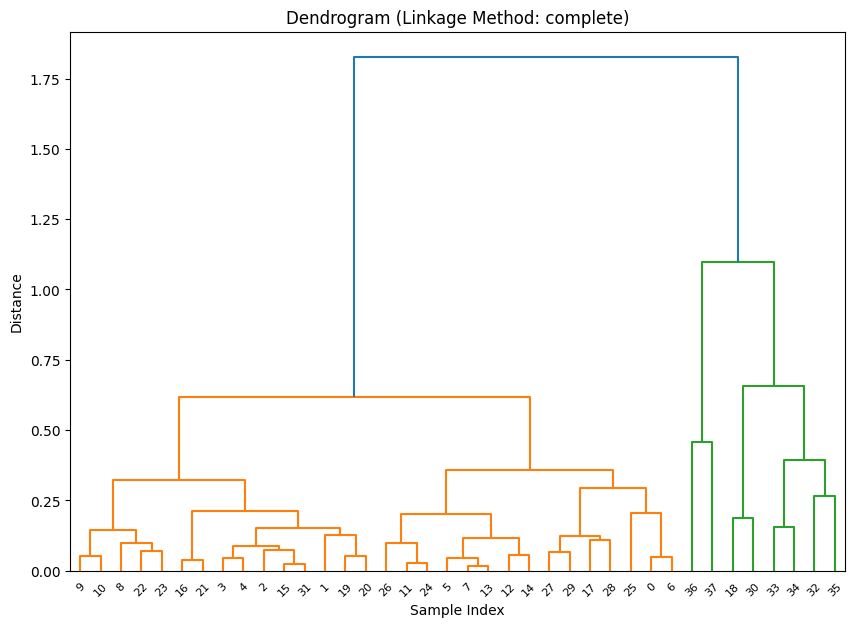

In [542]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(provinsi_scaled, method="complete")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: complete)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

##Average Linkage

In [543]:
# train agglomerative clustering with 2 clusters, linkage="average"
from sklearn.cluster import AgglomerativeClustering
agg_clus_average = AgglomerativeClustering(n_clusters=2,linkage="average")
agg_clus_average.fit(provinsi_scaled)

AgglomerativeClustering(linkage='average')

In [544]:
# assign clusters to provinsi dataframe
provinsi["label_average"] = agg_clus_average.labels_
provinsi.head()

,38 Provinsi,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah,label,label_single,label_complete,label_average
0,ACEH,12.33,1.84,0.42,716522,0,1,1,1
1,SUMATERA UTARA,7.36,1.13,0.26,694542,0,1,1,1
2,SUMATERA BARAT,5.35,0.74,0.16,753614,0,1,1,1
3,RIAU,6.16,0.87,0.20,758174,0,1,1,1
4,JAMBI,7.19,0.98,0.20,759799,0,1,1,1


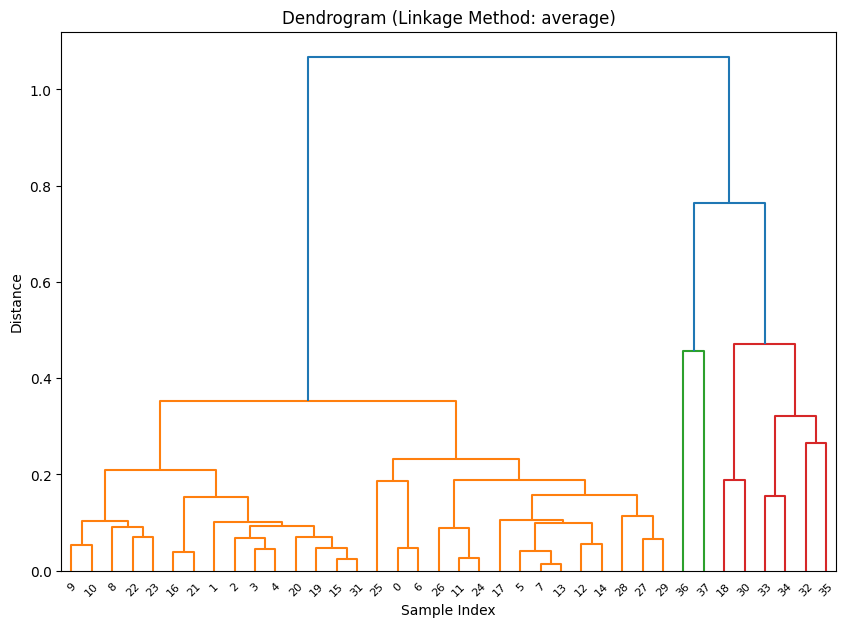

In [545]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(provinsi_scaled, method="average")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: average)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

##Ward Linkage

In [546]:
# train agglomerative clustering with 2 clusters, linkage="ward"
from sklearn.cluster import AgglomerativeClustering
agg_clus_ward = AgglomerativeClustering(n_clusters=2,linkage="ward")
agg_clus_ward.fit(provinsi_scaled)

AgglomerativeClustering()

In [547]:
# assign clusters to customer dataframe
provinsi["label_ward"] = agg_clus_ward.labels_
provinsi.head()

,38 Provinsi,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah,label,label_single,label_complete,label_average,label_ward
0,ACEH,12.33,1.84,0.42,716522,0,1,1,1,0
1,SUMATERA UTARA,7.36,1.13,0.26,694542,0,1,1,1,0
2,SUMATERA BARAT,5.35,0.74,0.16,753614,0,1,1,1,0
3,RIAU,6.16,0.87,0.20,758174,0,1,1,1,0
4,JAMBI,7.19,0.98,0.20,759799,0,1,1,1,0


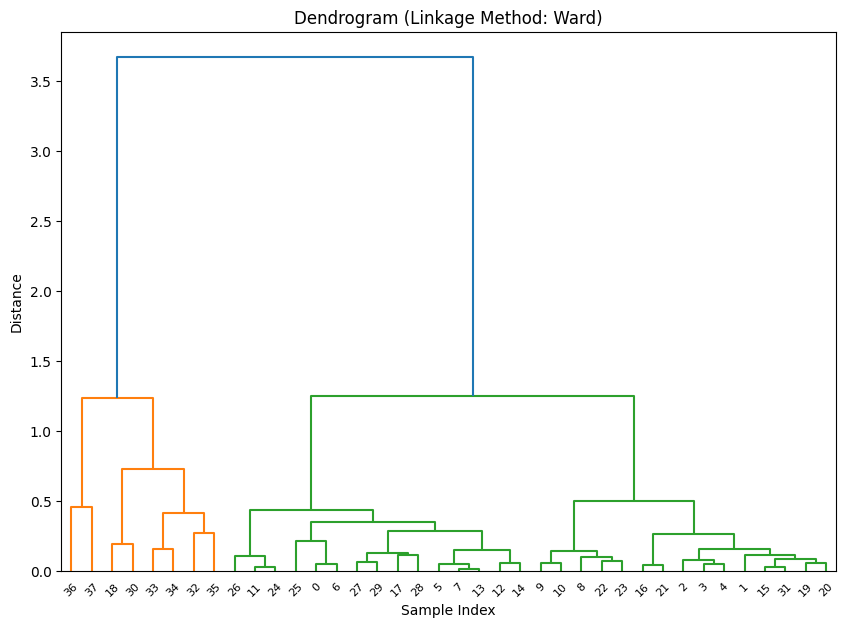

In [548]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(provinsi_scaled, method="ward")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: Ward)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

#Cluster validation

In [549]:
linkages = ['single','complete','average','ward']
metrics  = ['euclidean','manhattan','canberra']

results = [
    [L, M,
     round(silhouette_score(
           provinsi_scaled,
           AgglomerativeClustering(
               n_clusters=2, linkage=L, metric=('euclidean' if L=='ward' else M)
           ).fit_predict(provinsi_scaled),
           metric=M
     ), 2)]
    for L in linkages for M in metrics
]

tabel = (pd.DataFrame(results, columns=['Metode','Jarak','Silhouette'])
         .pivot(index='Metode', columns='Jarak', values='Silhouette')
         .loc[linkages, metrics])

tabel.index  = ['Single Linkage','Complete Linkage','Average Linkage','Ward Linkage']
tabel.columns = ['Jarak Euclidean','Jarak Manhattan','Jarak Canberra']

display(tabel)


,Jarak Euclidean,Jarak Manhattan,Jarak Canberra
Single Linkage,0.62,0.64,0.41
Complete Linkage,0.68,0.70,0.37
Average Linkage,0.68,0.70,0.41
Ward Linkage,0.68,0.70,0.37


Metode Average Linkage merupakan pilihan terbaik karena memberikan nilai Silhouette tertinggi dan paling konsisten pada semua jenis jarak.

In [550]:
# Export the 'provinsi' DataFrame with all its cluster labels
provinsi.to_excel("provinsi_clustered (agglomerative)_data.xlsx", index=False)
print("Clustered 'provinsi' data saved to 'provinsi_clustered (agglomerative)_data.xlsx'")

Clustered 'provinsi' data saved to 'provinsi_clustered (agglomerative)_data.xlsx'


#K-medoids

In [551]:
!pip install pyclustering

from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
from sklearn.metrics import silhouette_score
import numpy as np

##k-medoids Clustering

In [552]:
# tentukan jumlah cluster
k = 2

# pilih medoid awal (acak)
initial_medoids = list(np.random.choice(len(provinsi_scaled), k, replace=False))

# buat model k-medoids
kmed = kmedoids(provinsi_scaled, initial_medoids)

# proses
kmed.process()

# hasil cluster & medoid
clusters = kmed.get_clusters()
medoids = kmed.get_medoids()


In [553]:
# inisialisasi label dengan nilai -1
labels = [-1] * len(provinsi_scaled)

# isi label berdasarkan hasil cluster
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        labels[index] = cluster_id

# masukkan label ke dataframe
provinsi["Label k-medoids"] = labels

# tampilkan 5 baris pertama
provinsi.head()


,38 Provinsi,Persentase Penduduk Miskin (P0) Menurut Provinsi dan Daerah (Persen),Indeks Kedalaman Kemiskinan (P1) Menurut Provinsi dan Daerah (Persen),Indeks Keparahan Kemiskinan (P2) Menurut Provinsi dan Daerah (Persen),Garis Kemiskinan (Rupiah/Kapita/Bulan) Menurut Provinsi dan Daerah,label,label_single,label_complete,label_average,label_ward,Label k-medoids
0,ACEH,12.33,1.84,0.42,716522,0,1,1,1,0,0
1,SUMATERA UTARA,7.36,1.13,0.26,694542,0,1,1,1,0,0
2,SUMATERA BARAT,5.35,0.74,0.16,753614,0,1,1,1,0,0
3,RIAU,6.16,0.87,0.20,758174,0,1,1,1,0,0
4,JAMBI,7.19,0.98,0.20,759799,0,1,1,1,0,0


##Validasi cluster

In [554]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric

# VALIDASI K-MEDOIDS DENGAN 3 METRIK JARAK
def kmedoids_cluster_validation_all_metrics(data_scaled, k_values):

    results = []

    for k in k_values:
        # For reproducibility, select initial medoids once per k value
        # and use the same initial medoids for all distance metrics
        np.random.seed(42)
        initial_medoid_indices = np.random.choice(len(data_scaled), k, replace=False).tolist()

        # ------------------------------
        # 1. EUCLIDEAN
        # ------------------------------
        metric_euc = distance_metric(type_metric.EUCLIDEAN)
        kmedoids_euc = kmedoids(data_scaled, initial_medoid_indices, metric=metric_euc)
        kmedoids_euc.process()
        clusters_euc = kmedoids_euc.get_clusters()
        labels_euc = np.zeros(len(data_scaled), dtype=int)
        for cluster_idx, cluster_points in enumerate(clusters_euc):
            for point_idx in cluster_points:
                labels_euc[point_idx] = cluster_idx
        sil_euc = silhouette_score(data_scaled, labels_euc, metric="euclidean")

        # ------------------------------
        # 2. MANHATTAN
        # ------------------------------
        metric_man = distance_metric(type_metric.MANHATTAN)
        kmedoids_man = kmedoids(data_scaled, initial_medoid_indices, metric=metric_man)
        kmedoids_man.process()
        clusters_man = kmedoids_man.get_clusters()
        labels_man = np.zeros(len(data_scaled), dtype=int)
        for cluster_idx, cluster_points in enumerate(clusters_man):
            for point_idx in cluster_points:
                labels_man[point_idx] = cluster_idx
        sil_man = silhouette_score(data_scaled, labels_man, metric="manhattan")

        # ------------------------------
        # 3. CANBERRA
        # ------------------------------
        metric_can = distance_metric(type_metric.CANBERRA)
        kmedoids_can = kmedoids(data_scaled, initial_medoid_indices, metric=metric_can)
        kmedoids_can.process()
        clusters_can = kmedoids_can.get_clusters()
        labels_can = np.zeros(len(data_scaled), dtype=int)
        for cluster_idx, cluster_points in enumerate(clusters_can):
            for point_idx in cluster_points:
                labels_can[point_idx] = cluster_idx
        sil_can = silhouette_score(data_scaled, labels_can, metric="canberra")

        # Simpan hasil
        results.append({
            "k": k,
            "Silhouette_Euclidean": round(sil_euc, 4),
            "Silhouette_Manhattan": round(sil_man, 4),
            "Silhouette_Canberra": round(sil_can, 4)
        })

    return pd.DataFrame(results)
validation_results = kmedoids_cluster_validation_all_metrics(provinsi_scaled, [2])
validation_results

,k,Silhouette_Euclidean,Silhouette_Manhattan,Silhouette_Canberra
0,2,0.6846,0.6996,0.3728


Jumlah cluster terbaik adalah k = 2, dengan kualitas pemodelan paling baik menggunakan jarak Manhattan karena menghasilkan nilai Silhouette tertinggi.

In [555]:
# Export the 'provinsi' DataFrame with all its cluster labels
provinsi.to_excel("provinsi_clustered (k-medoids)_data.xlsx", index=False)
print("Clustered 'provinsi' data saved to 'provinsi_clustered (k-medoids)_data.xlsx'")

Clustered 'provinsi' data saved to 'provinsi_clustered (k-medoids)_data.xlsx'


# Selesai